In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§
file_path = "cabbage_separated.csv"
df = pd.read_csv(file_path)

# 'rate'Í∞Ä 'HIGH'Ïù∏ Îç∞Ïù¥ÌÑ∞
high_df = df[df['rate'] == 'HIGH']

# 'rate'Í∞Ä 'Special'Ïù∏ Îç∞Ïù¥ÌÑ∞
special_df = df[df['rate'] == 'Special']

# ÌååÏùºÎ°ú Ï†ÄÏû•
high_path = "cabbage_HIGH.csv"
special_path = "cabbage_Special.csv"
high_df.to_csv(high_path, index=False)
special_df.to_csv(special_path, index=False)

high_path, special_path


('cabbage_HIGH.csv', 'cabbage_Special.csv')

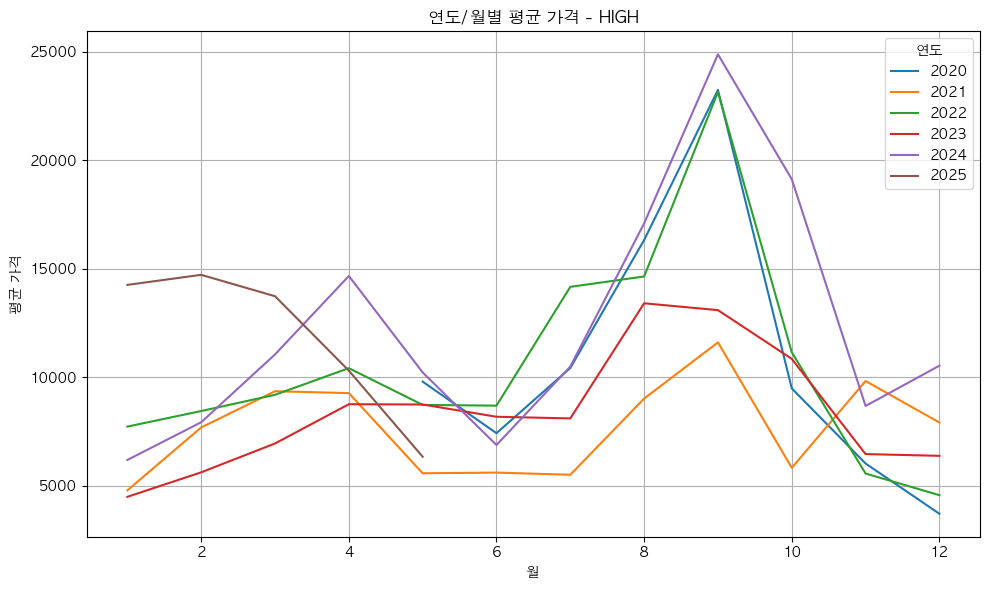

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# HIGH Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Î∂àÎü¨Ïò§Í∏∞
high_df = pd.read_csv("cabbage_HIGH.csv")

# Ïó∞ÎèÑ/ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
grouped_high = high_df.groupby(['year', 'month'])['avg_price'].mean().reset_index()

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_high = grouped_high.pivot(index='month', columns='year', values='avg_price')

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
for year in pivot_high.columns:
    plt.plot(pivot_high.index, pivot_high[year], label=str(year))
plt.title('Ïó∞ÎèÑ/ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© - HIGH')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤©')
plt.legend(title='Ïó∞ÎèÑ')
plt.grid(True)
plt.tight_layout()
plt.show()

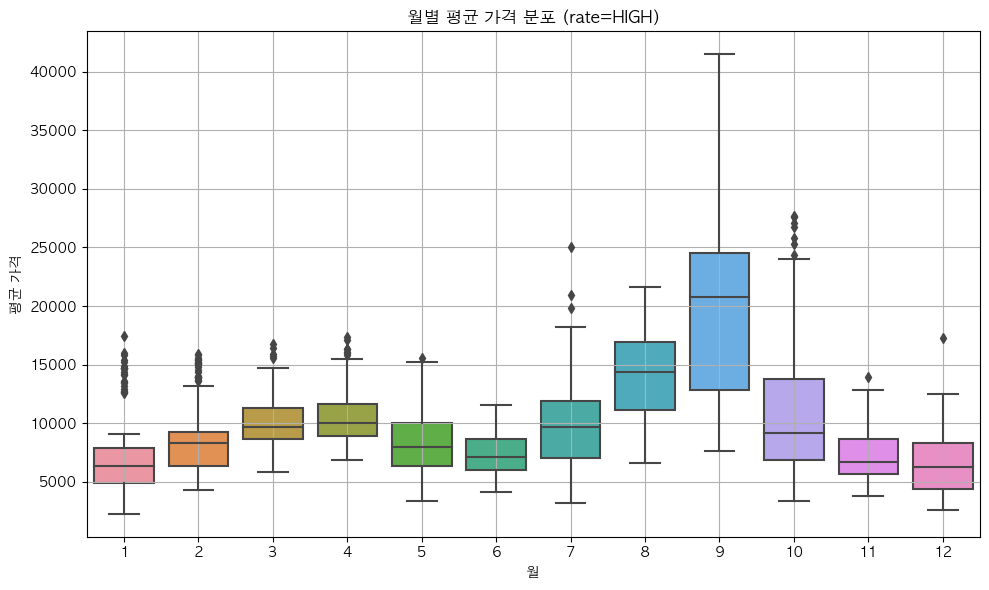

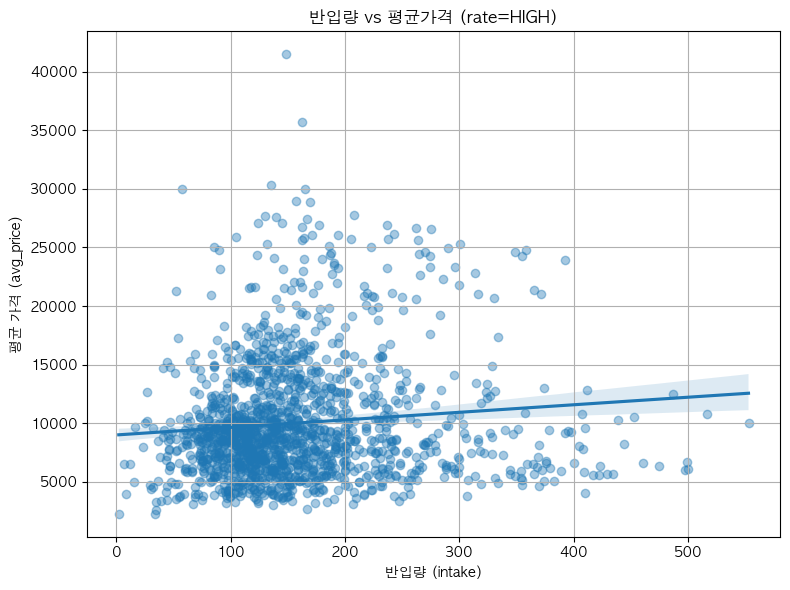

      year  month  day  intake  avg_price   gap  rate  abs_gap
33    2020      6   15      85      11538  6207  HIGH     6207
39    2020      6   22     121       9328  3807  HIGH     3807
56    2020      7   11      51      14321  4673  HIGH     4673
57    2020      7   13     203       9946 -4375  HIGH     4375
63    2020      7   20     116      13943  4678  HIGH     4678
...    ...    ...  ...     ...        ...   ...   ...      ...
1357  2024     10   19     161      12803 -6006  HIGH     6006
1358  2024     10   21     173      16681  3878  HIGH     3878
1391  2024     11   28     221      13956  3889  HIGH     3889
1392  2024     11   29     395       9361 -4595  HIGH     4595
1419  2024     12   31      54      17295  5058  HIGH     5058

[77 rows x 8 columns]


In [6]:
# Îã§Ïãú ÌïÑÏöîÌïú Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ÌååÏùº Î°úÎìú
high_df = pd.read_csv("cabbage_HIGH.csv")

# 1Î≤à: ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÏÇ∞ Î∂ÑÏÑù (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=high_df, x='month', y='avg_price')
plt.title('ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÌè¨ (rate=HIGH)')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤©')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2Î≤à: ÌèâÍ∑† Í∞ÄÍ≤©Í≥º Î∞òÏûÖÎüâ(intake)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†)
plt.figure(figsize=(8, 6))
sns.regplot(data=high_df, x='intake', y='avg_price', scatter_kws={"alpha":0.4})
plt.title('Î∞òÏûÖÎüâ vs ÌèâÍ∑†Í∞ÄÍ≤© (rate=HIGH)')
plt.xlabel('Î∞òÏûÖÎüâ (intake)')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤© (avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5Î≤à: Í∞ÄÍ≤© Í∏âÎì±/Í∏âÎùΩ ÏãúÏ†ê ÌÉêÏßÄ (gap Í∏∞Ï§Ä ÏÉÅÌïòÏúÑ 5%)
gap_sorted = high_df.copy()
gap_sorted['abs_gap'] = gap_sorted['gap'].abs()
threshold = gap_sorted['abs_gap'].quantile(0.95)
extreme_gap_df = gap_sorted[gap_sorted['abs_gap'] >= threshold]

print(extreme_gap_df)


### ‚úÖ 1. ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∂ÑÌè¨ (Boxplot)
Í∞ÄÍ≤© Î∂ÑÏÇ∞Ïù¥ ÌÅ∞ Îã¨: 5Ïõî, 6Ïõî, 7Ïõî

Ïù¥ÏÉÅÏπòÍ∞Ä ÌäπÌûà ÎßéÏùÄ Îã¨: 6Ïõî~8Ïõî

Í≥ÑÏ†àÏÑ±Í≥º Ïù¥ÏÉÅÍ∞ÄÍ≤©ÏùÑ ÌïúÎààÏóê ÌååÏïÖÌï† Ïàò ÏûàÏùå

### ‚úÖ 2. Î∞òÏûÖÎüâ vs ÌèâÍ∑†Í∞ÄÍ≤© Í¥ÄÍ≥Ñ (Scatter + ÌöåÍ∑ÄÏÑ†)
ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏïΩÌïòÍ≤å Ï°¥Ïû¨
‚Üí Î∞òÏûÖÎüâÏù¥ ÎßéÏùÑÏàòÎ°ù Í∞ÄÍ≤©Ïù¥ Îã§ÏÜå ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•

Í∑∏Îü¨ÎÇò ÏôÑÏ†ÑÌïú ÏÑ†Ìòï Í¥ÄÍ≥ÑÎäî ÏïÑÎãàÎ©∞ ÏÇ∞Ìè¨Í∞Ä ÌÅº

### ‚úÖ 5. Í∞ÄÍ≤© Í∏âÎì±/Í∏âÎùΩ ÏÉÅÏúÑ 5% (gap Í∏∞Ï§Ä)
ÏòàÏãú:

üìà 2020-06-15 ‚Üí +6207Ïõê (Í∏âÎì±)

üìâ 2020-07-13 ‚Üí -4375Ïõê (Í∏âÎùΩ)

Í∏âÍ≤©Ìïú Î≥ÄÌôîÎäî Î≥¥ÌÜµ Ïó¨Î¶ÑÏ≤†(6~7Ïõî)Ïóê ÏßëÏ§ëÎê®
‚Üí Í∏∞ÌõÑ, Ìè≠Ïö∞, ÌÉúÌíç Îì±Í≥ºÏùò Ïó∞Í¥Ä Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨